In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

In [41]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [43]:
gbm_model = GradientBoostingRegressor() 

In [45]:
gbm_model.fit(X_train,y_train)

GradientBoostingRegressor()

# Predict

In [48]:
y_pred = gbm_model.predict(X_test)

In [50]:
np.sqrt(mean_squared_error(y_test,y_pred))

354.75182439671744

# Model tuning

In [55]:
gbm_params = {"learning_rate" : [0.001, 0.01 , 0.1 , 0.2],
              "max_depth" : [3,5,8,50,100],
              "n_estimators" : [200,500,1000,2000],
              "subsample" : [1,0.5,0.75],
             }

In [61]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm,gbm_params,cv = 10,n_jobs = -1,verbose = 2)
gbm_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [63]:
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 100, 'n_estimators': 200, 'subsample': 0.5}

In [76]:
gbm_tuned  = GradientBoostingRegressor(learning_rate = 0.1, 
                                       max_depth = 5,
                                       n_estimators = 200,
                                       subsample = 0.5)
gbm_tuned  = gbm_tuned.fit(X_train,y_train)

In [78]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

333.86668820015825

In [83]:
Importance = pd.DataFrame({"Importance" : gbm_tuned.feature_importances_*100},
                          index = X_train.columns)

NameError: name 'plt' is not defined

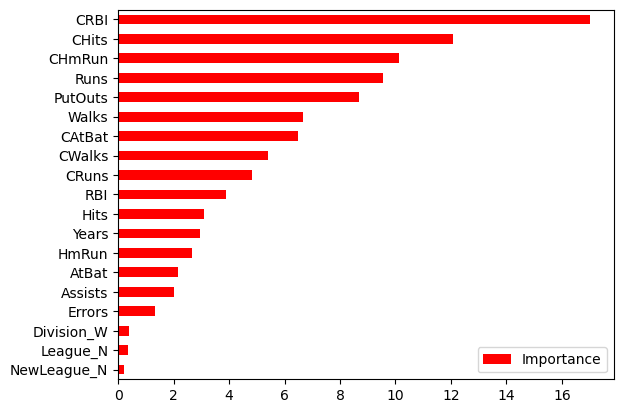

In [86]:
Importance.sort_values( by = "Importance" ,
                       axis = 0,
                       ascending  = True).plot(kind= "barh",
                                               color = "r")
plt.xlabel("Importance")